In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
# Importing dataset
import_df = pd.read_csv(r'D:\Prot\Data Analyst\UM selected projects\A_Laptop Price\laptop_prices_cleaned_sql.csv')


In [326]:
# Creating copy of the original dataframe
laptop_details_df = import_df.copy()


In [327]:
# Querying for 1st 5 rows
laptop_details_df.head()


,Company,Product,Type_Name,Inches,Ram_gb,OS,Weight_kg,Price_euros,Screen,Screen_W_pixels,...,Retina_Display,CPU_company,CPU_freq_Hz,CPU_model,Primary_Storage_gb,Secondary_Storage_gb,Primary_Storage_Type,Secondary_Storage_Type,GPU_company,GPU_model
0,Lenovo,Yoga Book,2 in 1 Convertible,10.1,4,Android,0.69,319.0,Standard,1920,...,No,Intel,1.44,Atom x5-Z8550,64,NaN,Flash Storage,NaN,Intel,HD Graphics 400\r
1,Acer,Chromebook C910-C2ST,Notebook,15.6,2,Chrome OS,2.19,199.0,Standard,1366,...,No,Intel,1.50,Celeron Dual Core 3205U,16,NaN,SSD,NaN,Intel,HD Graphics\r
2,Lenovo,ThinkPad 13,Notebook,13.3,4,Chrome OS,1.45,459.9,Standard,1366,...,No,Intel,1.60,Celeron Dual Core 3855U,16,NaN,Flash Storage,NaN,Intel,HD Graphics 510\r
3,Samsung,Chromebook 3,Netbook,11.6,4,Chrome OS,1.15,269.0,Standard,1366,...,No,Intel,1.60,Celeron Dual Core N3060,16,NaN,Flash Storage,NaN,Intel,HD Graphics 400\r
4,Google,Pixelbook (Core,Ultrabook,12.3,16,Chrome OS,1.10,2199.0,Standard,2400,...,No,Intel,1.30,Core i7 7Y75,512,NaN,SSD,NaN,Intel,HD Graphics 615\r


In [328]:
# Querying for missing values
laptop_details_df.isnull().sum()


Company                     0
Product                     0
Type_Name                   0
Inches                      0
Ram_gb                      0
OS                          0
Weight_kg                   0
Price_euros                 0
Screen                      0
Screen_W_pixels             0
Screen_H_pixels             0
Touchscreen                 0
IPS_panel                   0
Retina_Display              0
CPU_company                 0
CPU_freq_Hz                 0
CPU_model                   0
Primary_Storage_gb          0
Secondary_Storage_gb      836
Primary_Storage_Type        0
Secondary_Storage_Type    836
GPU_company                 0
GPU_model                   0
dtype: int64

In [329]:
# Dropping unwanted columns
laptop_details_df = laptop_details_df.drop(['Secondary_Storage_gb','Secondary_Storage_Type','Product', 'GPU_model', 'CPU_model', 'Screen'],axis = 1)


* Most of the Secondary_Storage_gb and Secondary_Storage_Type have null values.
* Product,GPU model,CPU model,Screen are too specific.

In [331]:
# Querying for missing values
laptop_details_df.isnull().sum()


Company                 0
Type_Name               0
Inches                  0
Ram_gb                  0
OS                      0
Weight_kg               0
Price_euros             0
Screen_W_pixels         0
Screen_H_pixels         0
Touchscreen             0
IPS_panel               0
Retina_Display          0
CPU_company             0
CPU_freq_Hz             0
Primary_Storage_gb      0
Primary_Storage_Type    0
GPU_company             0
dtype: int64

In [332]:
# Summary of the dataset
laptop_details_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1000 non-null   object 
 1   Type_Name             1000 non-null   object 
 2   Inches                1000 non-null   float64
 3   Ram_gb                1000 non-null   int64  
 4   OS                    1000 non-null   object 
 5   Weight_kg             1000 non-null   float64
 6   Price_euros           1000 non-null   float64
 7   Screen_W_pixels       1000 non-null   int64  
 8   Screen_H_pixels       1000 non-null   int64  
 9   Touchscreen           1000 non-null   object 
 10  IPS_panel             1000 non-null   object 
 11  Retina_Display        1000 non-null   object 
 12  CPU_company           1000 non-null   object 
 13  CPU_freq_Hz           1000 non-null   float64
 14  Primary_Storage_gb    1000 non-null   int64  
 15  Primary_Storage_Type  

In [333]:
# Analysing total number of rows and columns after dropping some columns
laptop_details_df.shape


(1000, 17)

In [334]:
# Statistical summary
laptop_details_df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1000,19,Dell,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_Name,1000,6,Notebook,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1000.0,NaN,NaN,NaN,15.0498,1.413668,10.1,14.0,15.6,15.6,18.4
Ram_gb,1000.0,NaN,NaN,NaN,8.512,4.973791,2.0,4.0,8.0,8.0,32.0
OS,1000,8,Windows 10,840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight_kg,1000.0,NaN,NaN,NaN,2.037788,0.662631,0.69,1.5,2.025,2.3,4.7
Price_euros,1000.0,NaN,NaN,NaN,1125.70607,705.380659,191.9,599.0,959.5,1474.25,6099.0
Screen_W_pixels,1000.0,NaN,NaN,NaN,1908.702,495.832344,1366.0,1920.0,1920.0,1920.0,3840.0
Screen_H_pixels,1000.0,NaN,NaN,NaN,1079.172,285.957952,768.0,1080.0,1080.0,1080.0,2160.0
Touchscreen,1000,2,No,855,NaN,NaN,NaN,NaN,NaN,NaN,NaN


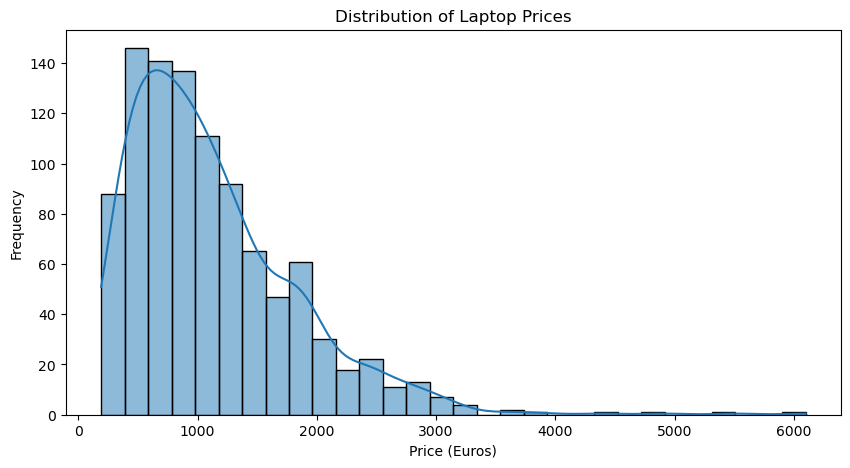

In [335]:
# Plotting laptop price distribution
plt.figure(figsize = (10,5))
sns.histplot(laptop_details_df['Price_euros'],kde = True,bins = 30)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")
plt.show()


* Right-skewed : Most laptops are priced below €2000.
* Few premium models costs €3000 - €6000

In [337]:
# Creating correlation among numerical values for heat map
corr = laptop_details_df.corr(numeric_only=True)


In [338]:
corr

,Inches,Ram_gb,Weight_kg,Price_euros,Screen_W_pixels,Screen_H_pixels,CPU_freq_Hz,Primary_Storage_gb
Inches,1.000000,0.232950,0.823924,0.070787,-0.046756,-0.070434,0.296132,0.261121
Ram_gb,0.232950,1.000000,0.389759,0.763395,0.455627,0.446953,0.373030,0.010368
Weight_kg,0.823924,0.389759,1.000000,0.219526,-0.003827,-0.025673,0.313245,0.171735
Price_euros,0.070787,0.763395,0.219526,1.000000,0.577174,0.575126,0.432448,-0.106040
Screen_W_pixels,-0.046756,0.455627,-0.003827,0.577174,1.000000,0.993551,0.187308,-0.050328
Screen_H_pixels,-0.070434,0.446953,-0.025673,0.575126,0.993551,1.000000,0.176713,-0.057319
CPU_freq_Hz,0.296132,0.373030,0.313245,0.432448,0.187308,0.176713,1.000000,0.053956
Primary_Storage_gb,0.261121,0.010368,0.171735,-0.106040,-0.050328,-0.057319,0.053956,1.000000


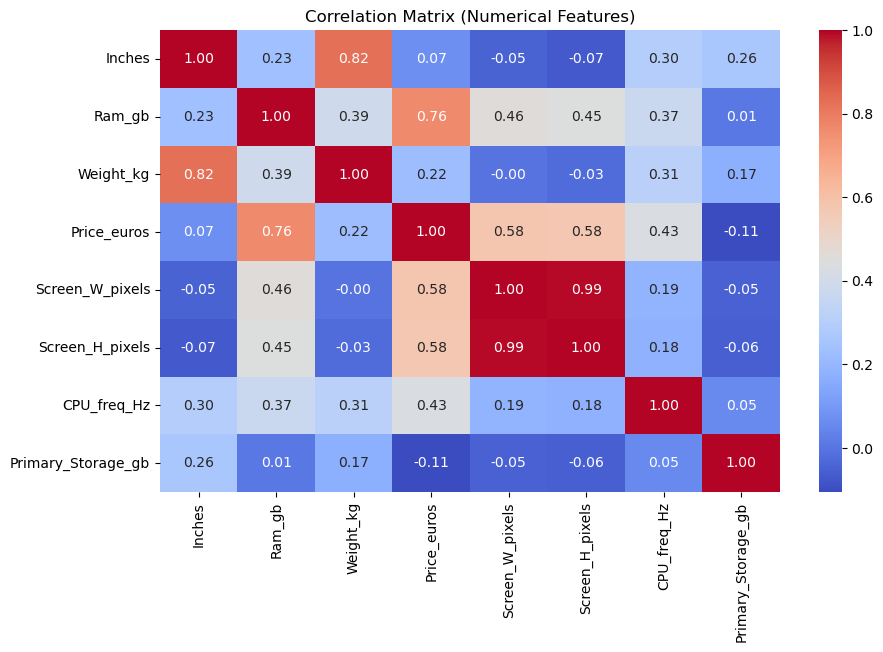

In [339]:
# Plotting heat map
plt.figure(figsize = (10,6))
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

* Primary Storage has no correlatoin with price. That means storage is not affecting the price.
* Weight and Inches have negligible correlation with price.
* CPU frequency and Screen Resolution (Screen_W_pixels, Screen_H_pixels) are moderately positively correlated with price.
* RAM is highly positively correlated with price. It means with increase of the size of RAM laptop price also increases.

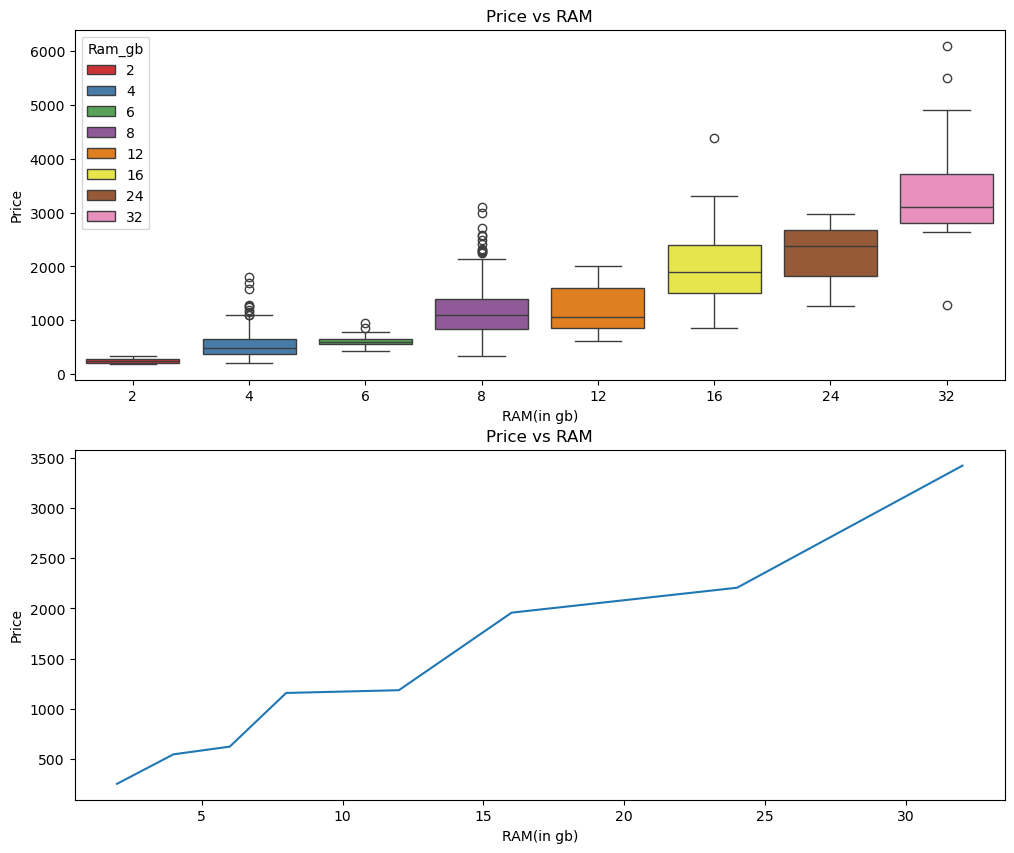

In [341]:
# Finding relation between RAM vs Price
plt.figure(figsize = (12,10))

# First Plot
plt.subplot(2,1,1)
sns.boxplot(x = 'Ram_gb', y = 'Price_euros',data = laptop_details_df,palette = 'Set1',hue = 'Ram_gb')
plt.title("Price vs RAM")
plt.xlabel('RAM(in gb)')
plt.ylabel('Price')

# Second Plot
plt.subplot(2,1,2)
sns.lineplot(x = 'Ram_gb', y = 'Price_euros',data = laptop_details_df,errorbar = None)
plt.title("Price vs RAM")
plt.xlabel('RAM(in gb)')
plt.ylabel('Price')
plt.show()

* There is clear price increase with higher RAM.
* Laptops with 32 GB RAM have high prices.

## Categorical features to analyze

In [344]:
# Computing price statistics by company
company_price_statistics = laptop_details_df.groupby('Company')['Price_euros']\
                                            .agg(['count','mean','median','max'])\
                                            .sort_values(by = 'mean',ascending=False)\
                                            .reset_index(inplace=False)\
                                            .round(2)

company_price_statistics

,Company,count,mean,median,max
0,Razer,5,3779.00,2899.00,6099.00
1,LG,3,2099.00,2099.00,2299.00
2,MSI,34,1789.75,1844.50,2799.00
3,Google,3,1677.67,1559.00,2199.00
4,Apple,17,1655.72,1510.00,2858.00
5,Microsoft,6,1612.31,1569.50,2589.00
6,Samsung,8,1507.75,1674.00,1849.00
7,Huawei,2,1424.00,1424.00,1499.00
8,Dell,237,1238.05,999.00,3659.40
9,Toshiba,41,1219.37,1180.00,2799.00


* Razer laptops have highest average and maximum price due to high end gaming laptops.
* MSI caters to gamers and creators.

In [346]:
categorical_cols = laptop_details_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Company', 'Type_Name', 'OS', 'Touchscreen', 'IPS_panel',
       'Retina_Display', 'CPU_company', 'Primary_Storage_Type', 'GPU_company'],
      dtype='object')

#### Plotting the categorical columns

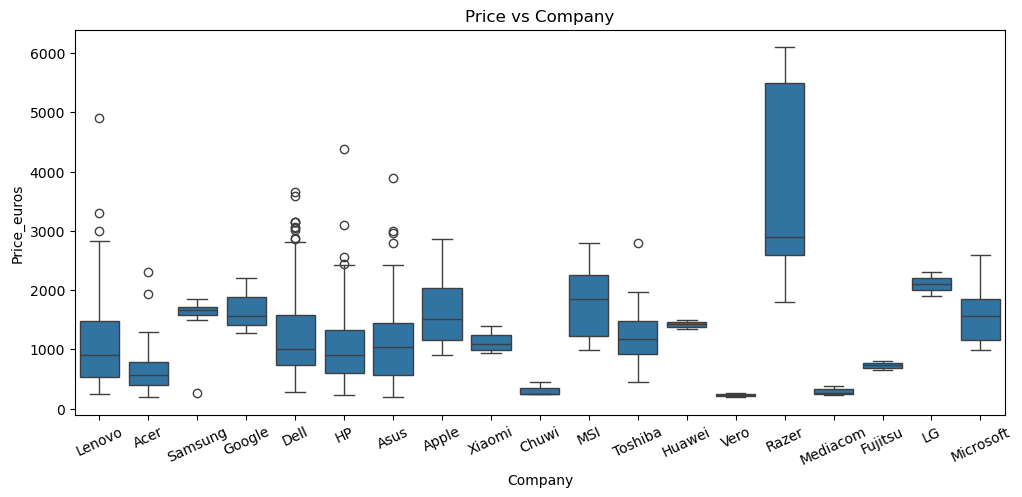

In [348]:
# Analyzing Price with Company
plt.figure(figsize = (12,5))
sns.boxplot (x = 'Company' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs Company")
plt.xticks(rotation = 25)
plt.show()

* Apple,MSI and Razer are the most expensive laptops.
* Samsung, Google, Huawei, LG they also provide expensive laptops around €1500-€2000 but their market share is less. 

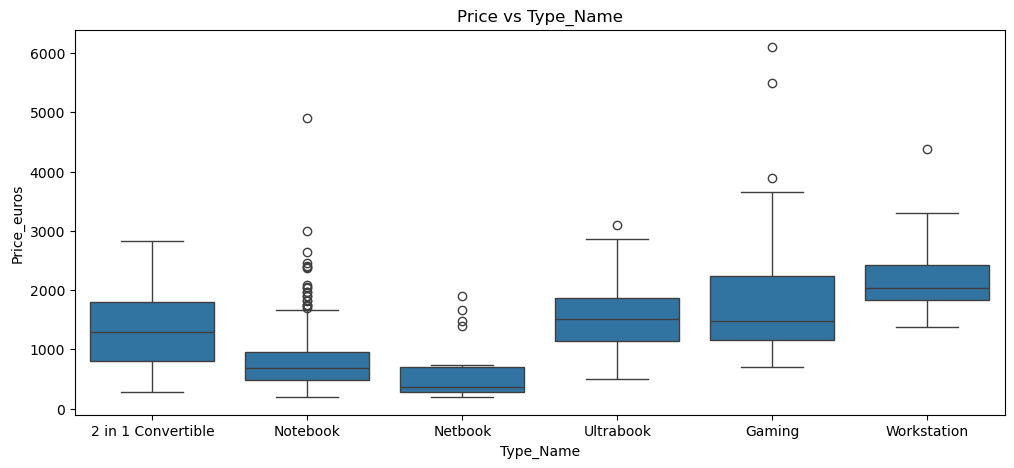

In [350]:
# Analyzing Price with Type_Name
plt.figure(figsize = (12,5))
sns.boxplot (x = 'Type_Name' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs Type_Name")
plt.show()

* Ultrabooks, Gaming, and Workstation laptops are more expensive.
* Convertibles have both low price and high price laptops catering to all round price.
* Notebooks and Netbooks are cheaper.

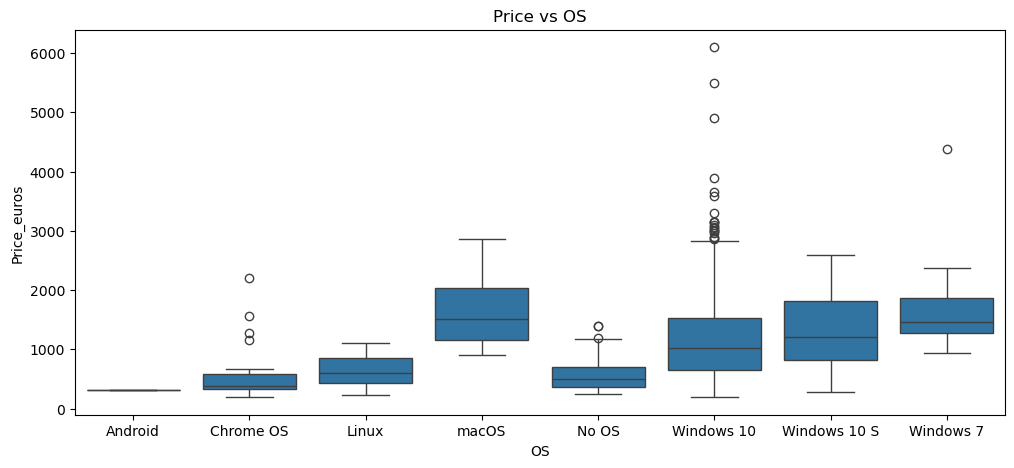

In [352]:
# Analyzing Price with OS
plt.figure(figsize = (12,5))
sns.boxplot (x = 'OS' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs OS")
plt.show()

* macOS and all Windows OS laptops that is Windows 10,Windows 10 S and Windows 7 dominate the market.
* No OS, Android, Chrome OS and Linux laptops are significantly cheaper.

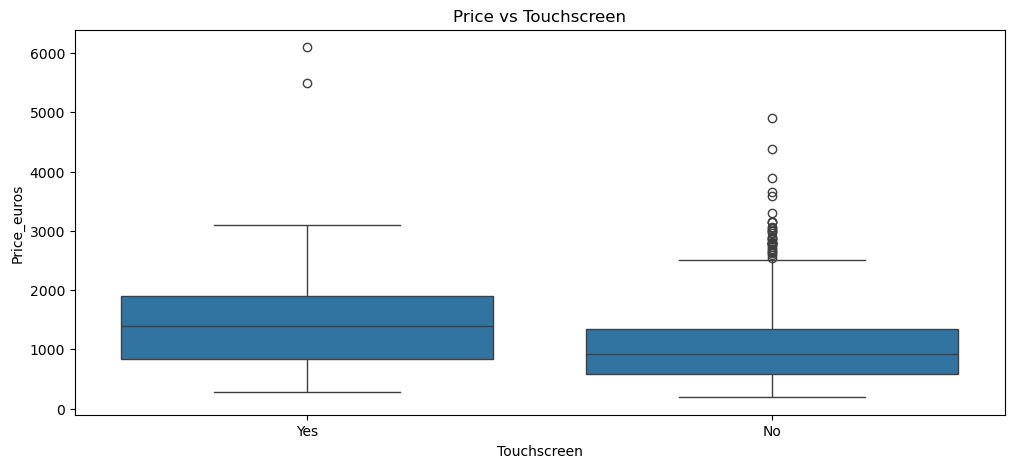

In [354]:
# Analyzing Price with Touchscreen
plt.figure(figsize = (12,5))
sns.boxplot (x = 'Touchscreen' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs Touchscreen")
plt.show()

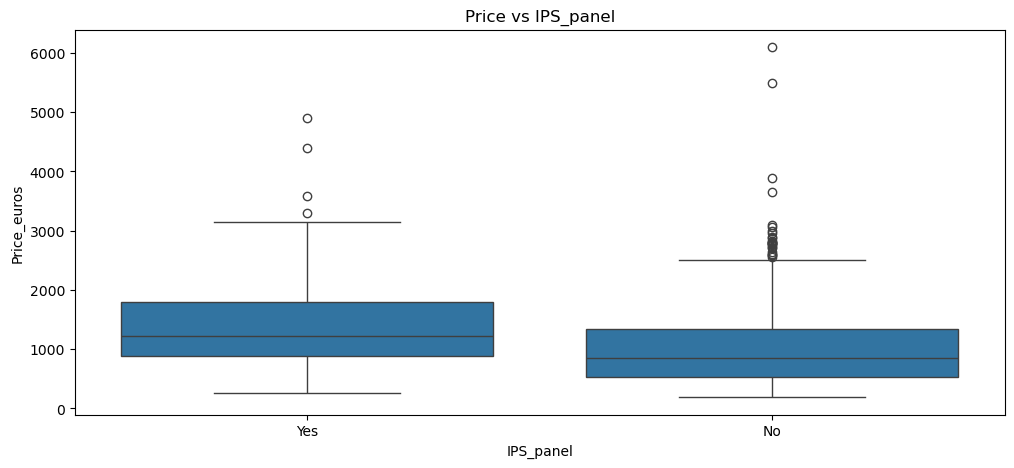

In [355]:
# Analyzing Price with IPS_panel
plt.figure(figsize = (12,5))
sns.boxplot (x = 'IPS_panel' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs IPS_panel")
plt.show()

* Laptops with Touchscreen or IPS panels are generally more expensive.

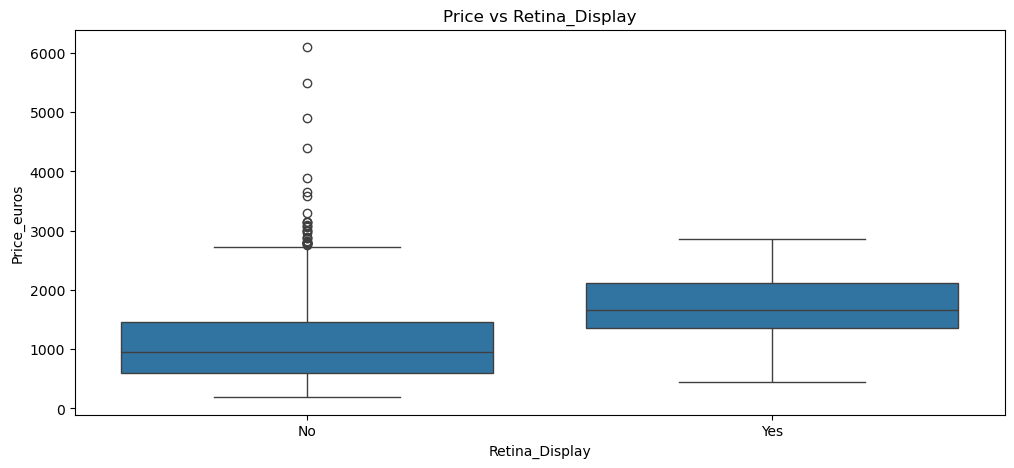

In [357]:
# Analyzing Price with Retina_Display
plt.figure(figsize = (12,5))
sns.boxplot (x = 'Retina_Display' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs Retina_Display")
plt.show()

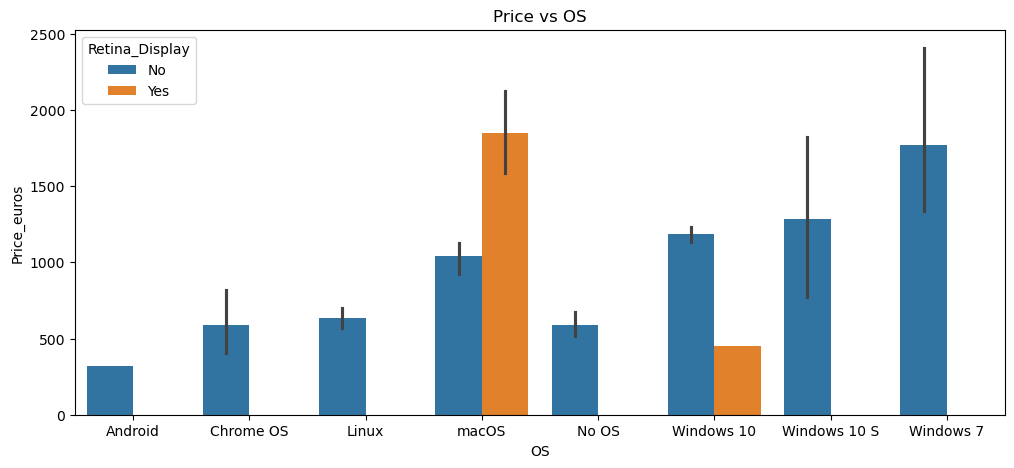

In [358]:
# Analyzing usage of retina display in OS
plt.figure(figsize = (12,5))
sns.barplot (x = 'OS' , y = 'Price_euros', data = laptop_details_df,hue = 'Retina_Display')
plt.title("Price vs OS")
plt.show()

* Only Apple laptops have Retina, which are premium-priced.
* Some Windows 10 OS laptops have retina display.

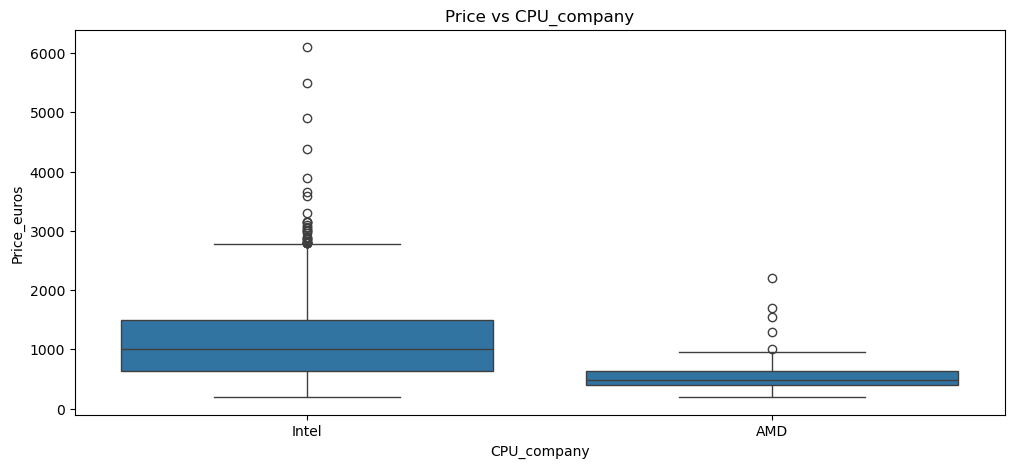

In [360]:
# Analyzing Price with CPU_company
plt.figure(figsize = (12,5))
sns.boxplot (x = 'CPU_company' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs CPU_company")
plt.show()

* Intel dominates the market, but AMD-powered laptops tend to be slightly more affordable.

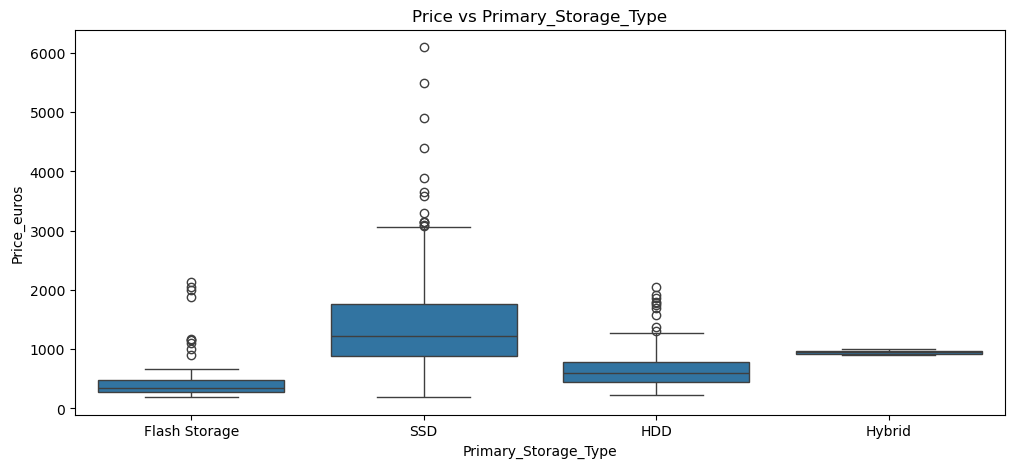

In [362]:
# Analyzing Price with Primary_Storage_Type
plt.figure(figsize = (12,5))
sns.boxplot (x = 'Primary_Storage_Type' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs Primary_Storage_Type")
plt.show()


* SSDs push the price up.
* FLash Storage are moderately priced.
* HDD-only laptops are cheaper.
* Very less usage of Hybrid storages.

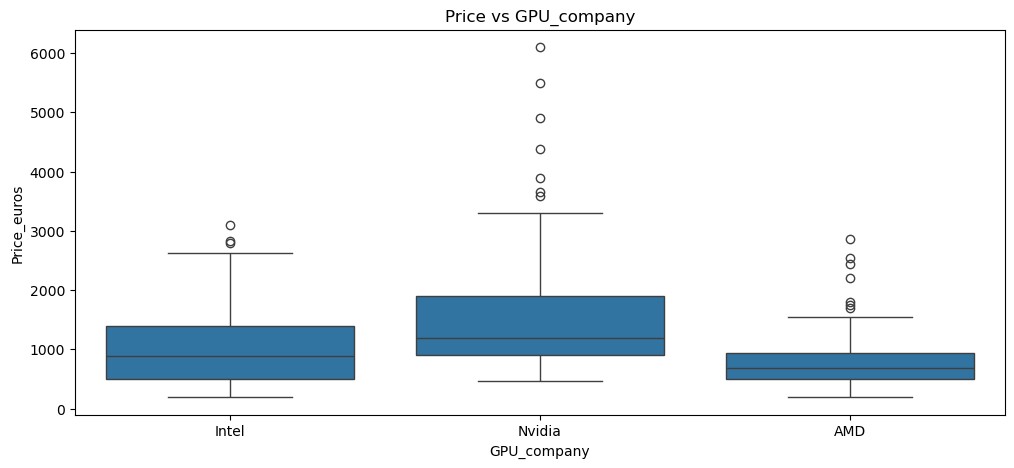

In [364]:
# Analyzing Price with GPU_company
plt.figure(figsize = (12,5))
sns.boxplot (x = 'GPU_company' , y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs GPU_company")
plt.show()

* NVIDIA GPUs are found in higher-end laptops.
* Intel GPUs dominate cheaper models.

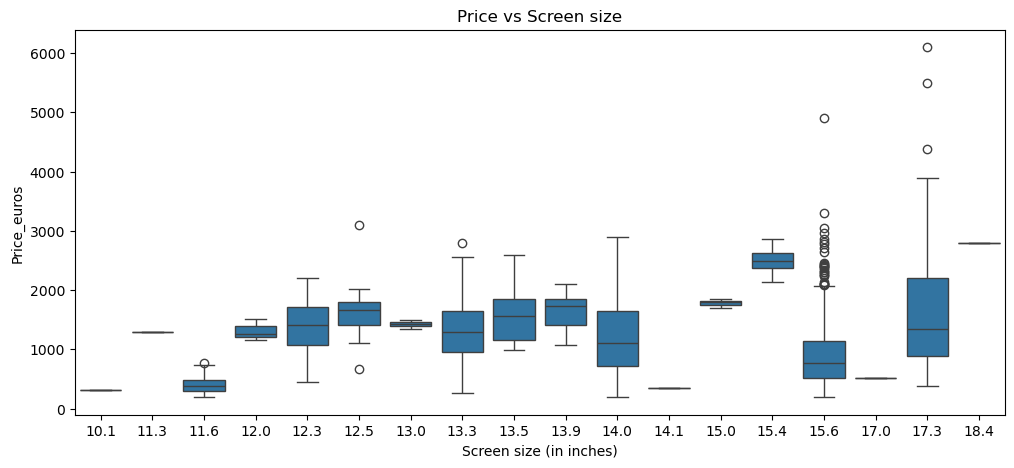

In [366]:
# Analyzing Price with Screen size
plt.figure(figsize = (12,5))
sns.boxplot(x = 'Inches', y = 'Price_euros', data = laptop_details_df)
plt.title("Price vs Screen size")
plt.xlabel('Screen size (in inches)')
plt.show()

* Screen of 15.6 inches is being preferred by the companies as it caters to all range of laptops.
* Most high end laptops are providing 17.3 inches screen for better visibility as high end laptops are mostly gaming laptos or high performance laptops.
* Most laptops are providing 12 to 14 inches screen for mid range to high performance laptops for better work experience.

<Axes: xlabel='OS'>

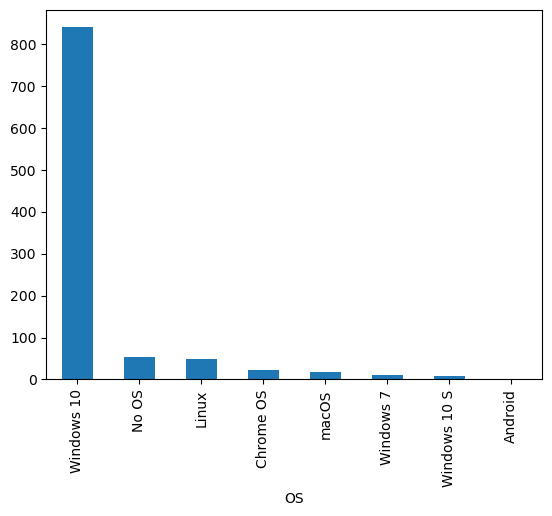

In [368]:
# Analyzing OS used by the companies
laptop_details_df['OS'].value_counts().plot(kind = 'bar')

* Windows 10 OS are mostly used by the companies.
* macOS is only for the Apple company.
* There are many laptops which has No OS that means any type of OS has not been pre installed.
* Android are least used OS.

#### Analysis

* From above analysis it is found that most laptops are priced below €2000.
* Primary storage does not impact laptop price.
* RAM is impacting the laptop price. Higher GB RAM installed in the laptop higher the laptop price.
* Razer company laptops are the most expensive laptops whose average price is €3779 which is way higher than other laptops followed by Apple,MSI.
* According to types of laptops, Ultrabooks,Gaming and Workstation laptops are expensive.
* macOS and Windows laptops are expensive.